<a href="https://colab.research.google.com/github/swarnika03/pythonpro/blob/master/MachineLearningModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Virtual Screening data.csv to Virtual Screening data.csv


Uploading Data to Colab

In [ ]:
import pandas as pd

# Loading the dataset
df = pd.read_csv('Virtual Screening data.csv', delimiter=';')

# Displaying the first few rows and column information to understand the structure of the data
data_info = df.info()
data_head = df.head()

data_info, data_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15780 entries, 0 to 15779
Data columns (total 47 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Molecule ChEMBL ID          15780 non-null  object 
 1   Molecule Name               2105 non-null   object 
 2   Molecule Max Phase          1905 non-null   float64
 3   Molecular Weight            15769 non-null  float64
 4   #RO5 Violations             15701 non-null  float64
 5   AlogP                       15701 non-null  float64
 6   Compound Key                15780 non-null  object 
 7   Smiles                      15748 non-null  object 
 8   Standard Type               15780 non-null  object 
 9   Standard Relation           13904 non-null  object 
 10  Standard Value              13910 non-null  float64
 11  Standard Units              13911 non-null  object 
 12  pChEMBL Value               9594 non-null   float64
 13  Data Validity Comment       345

(None,
   Molecule ChEMBL ID Molecule Name  Molecule Max Phase  Molecular Weight  \
 0      CHEMBL2447962           NaN                 NaN            324.90   
 1          CHEMBL473    DOFETILIDE                 4.0            441.58   
 2           CHEMBL85   RISPERIDONE                 4.0            410.49   
 3      CHEMBL1818825           NaN                 NaN            429.40   
 4      CHEMBL3233190           NaN                 NaN            577.69   
 
    #RO5 Violations  AlogP            Compound Key  \
 0              0.0   3.90  Dextro-(R)-bupivacaine   
 1              0.0   1.98              Dofetilide   
 2              0.0   3.59             Risperidone   
 3              0.0   4.39                      35   
 4              1.0   4.27                      14   
 
                                               Smiles Standard Type  \
 0             CCCCN1CCCC[C@@H]1C(=O)Nc1c(C)cccc1C.Cl          IC50   
 1  CN(CCOc1ccc(NS(C)(=O)=O)cc1)CCc1ccc(NS(C)(=O)=...        

Missing Data Calculation

In [ ]:
missing_data = df.isnull().sum()
print(missing_data[missing_data > 0])

Molecule Name                 13675
Molecule Max Phase            13875
Molecular Weight                 11
#RO5 Violations                  79
AlogP                            79
Smiles                           32
Standard Relation              1876
Standard Value                 1870
Standard Units                 1869
pChEMBL Value                  6186
Data Validity Comment         15435
Comment                       13427
Uo Units                       1872
Ligand Efficiency BEI          7187
Ligand Efficiency LE           7197
Ligand Efficiency LLE          7197
Ligand Efficiency SEI          7203
Assay Organism                 1128
Assay Tissue ChEMBL ID        15776
Assay Tissue Name             15776
Assay Cell Type                9037
Assay Subcellular Fraction    14834
Assay Parameters              15777
Assay Variant Accession       15752
Assay Variant Mutation        15752
Document Journal               1546
Document Year                   998
Cell ChEMBL ID              

# **Data Handling**



*   Dropping Unnecessary Columns




In [ ]:
# Column names needed to be dropped
columns_to_drop = ['Molecule Name', 'Molecule Max Phase', 'Data Validity Comment', 'Comment', 'Uo Units', 'Assay Tissue ChEMBL ID', 'Assay Tissue Name', 'Assay Parameters', 'Assay Variant Accession', 'Assay Variant Mutation', 'Cell ChEMBL ID', 'Properties', 'Standard Text Value', 'Standard Relation', 'Action Type', 'Assay Subcellular Fraction', 'Assay Cell Type', 'Document Journal', 'Document Year']  # Replace with your column names

# Dropping the columns
df_dropped = df.drop(columns=columns_to_drop, inplace=True)

In [ ]:
# Column names needed to be dropped
columns_drop = ['Compound Key', 'Potential Duplicate', 'BAO Label', 'Document ChEMBL ID', 'Source ID', 'Source Description']  # Replace with your column names

# Dropping the columns
df_dropped_data = df.drop(columns=columns_drop, inplace=True)

In [ ]:
# Displaying information about the DataFrame
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15780 entries, 0 to 15779
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Molecule ChEMBL ID     15780 non-null  object 
 1   Molecular Weight       15769 non-null  float64
 2   #RO5 Violations        15701 non-null  float64
 3   AlogP                  15701 non-null  float64
 4   Smiles                 15748 non-null  object 
 5   Standard Type          15780 non-null  object 
 6   Standard Value         13910 non-null  float64
 7   Standard Units         13911 non-null  object 
 8   pChEMBL Value          9594 non-null   float64
 9   Ligand Efficiency BEI  8593 non-null   float64
 10  Ligand Efficiency LE   8583 non-null   float64
 11  Ligand Efficiency LLE  8583 non-null   float64
 12  Ligand Efficiency SEI  8577 non-null   float64
 13  Assay ChEMBL ID        15780 non-null  object 
 14  Assay Description      15780 non-null  object 
 15  As



*   Analysing the necessary data for imputation



In [ ]:
# Displaying summary statistics
summary = df[['Ligand Efficiency BEI', 'Ligand Efficiency LE', 'Ligand Efficiency LLE', 'Ligand Efficiency SEI']].describe()
print(summary)

# Displaying count of missing values
missing_counts = df[['Ligand Efficiency BEI', 'Ligand Efficiency LE', 'Ligand Efficiency LLE', 'Ligand Efficiency SEI']].isnull().sum()
print("\nMissing values count:\n", missing_counts)

       Ligand Efficiency BEI  Ligand Efficiency LE  Ligand Efficiency LLE  \
count            8593.000000           8583.000000            8583.000000   
mean               12.970272              0.248955               1.519936   
std                 3.310803              0.064256               1.389629   
min                 4.290000              0.100000              -5.520000   
25%                10.650000              0.200000               0.700000   
50%                12.380000              0.240000               1.510000   
75%                14.680000              0.280000               2.360000   
max                37.760000              0.680000               6.750000   

       Ligand Efficiency SEI  
count            8577.000000  
mean               11.272179  
std                17.686051  
min                 2.050000  
25%                 5.450000  
50%                 7.550000  
75%                10.960000  
max               258.230000  

Missing values count:
 Lig

In [ ]:
# Installing the necessary library for imputation
!pip install scikit-learn



*   Imputing columns



In [ ]:
# importing KNN Imputer
from sklearn.impute import KNNImputer

# Selecting columns for imputation
ligand_efficiency_columns = ['Ligand Efficiency BEI', 'Ligand Efficiency LE',
                              'Ligand Efficiency LLE', 'Ligand Efficiency SEI']

# Defining KNN imputer
knn_imputer = KNNImputer(n_neighbors=5)

# Imputing missing values
df[ligand_efficiency_columns] = knn_imputer.fit_transform(df[ligand_efficiency_columns])

In [ ]:
# Importing numpy
import numpy as np

# Defining a small constant to handle zero values in Standard Value
epsilon = 1e-10

# Converting Standard Value from nM to Molar (M)
df['Standard Value (M)'] = df['Standard Value'] * 1e-9

# Adding the small constant to Standard Value to avoid log(0)
df['Standard Value (M)'] = df['Standard Value (M)'].replace(0, epsilon)

# Imputing missing pChEMBL Value
df['pChEMBL Value'] = df.apply(
    lambda row: -np.log10(row['Standard Value']) if pd.isna(row['pChEMBL Value']) else row['pChEMBL Value'],
    axis=1
)

# print(df['pChEMBL Value'])

In [ ]:
# Defining a placeholder for missing values
placeholder = 'Unknown'

# Imputing missing values in the 'Assay Organism' column with the placeholder
df['Assay Organism'].fillna(placeholder, inplace=True)

# Verifying that there are no missing values left in the 'Assay Organism' column
missing_values_after = df['Assay Organism'].isnull().sum()
print(missing_values_after[missing_values_after > 0])

[]


In [ ]:
# Define the columns with missing values
columns_to_check = ['#RO5 Violations', 'AlogP','Smiles', 'Molecular Weight', 'Standard Value']

# Remove rows where any of the specified columns have missing values
df.dropna(subset=columns_to_check, inplace=True) # Remove inplace=True

# Check if any missing values remain in the specified columns
missing_values_after = df.isnull().sum()
print(missing_values_after[missing_values_after > 0])

Series([], dtype: int64)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13885 entries, 0 to 15779
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Molecule ChEMBL ID     13885 non-null  object 
 1   Molecular Weight       13885 non-null  float64
 2   #RO5 Violations        13885 non-null  float64
 3   AlogP                  13885 non-null  float64
 4   Smiles                 13885 non-null  object 
 5   Standard Type          13885 non-null  object 
 6   Standard Value         13885 non-null  float64
 7   Standard Units         13885 non-null  object 
 8   pChEMBL Value          13885 non-null  float64
 9   Ligand Efficiency BEI  13885 non-null  float64
 10  Ligand Efficiency LE   13885 non-null  float64
 11  Ligand Efficiency LLE  13885 non-null  float64
 12  Ligand Efficiency SEI  13885 non-null  float64
 13  Assay ChEMBL ID        13885 non-null  object 
 14  Assay Description      13885 non-null  object 
 15  Assay T

# **Feature Engineering**

In [ ]:
!pip install rdkit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.1/33.1 MB 55.2 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Descriptors, PandasTools

# Convert SMILES to molecular descriptors
def smiles_to_descriptors(Smiles):
    mol = Chem.MolFromSmiles(Smiles)
    if mol:
        return {
            'NumRotatableBonds': Descriptors.NumRotatableBonds(mol),
            # Add more descriptors as needed
        }
    return {}

descriptors = df['Smiles'].apply(smiles_to_descriptors)
descriptor_df = pd.json_normalize(descriptors)
df = pd.concat([df, descriptor_df], axis=1)

# Drop columns not used for modeling
df = df.drop(columns=['Smiles', 'Assay ChEMBL ID', 'Assay Description', 'Target ChEMBL ID', 'Target Organism'])

In [ ]:
df.head()

,Molecule ChEMBL ID,Molecular Weight,#RO5 Violations,AlogP,Standard Type,Standard Value,Standard Units,pChEMBL Value,Ligand Efficiency BEI,Ligand Efficiency LE,Ligand Efficiency LLE,Ligand Efficiency SEI,Assay Type,BAO Format ID,Assay Organism,Target Name,Target Type,Standard Value (M),NumRotatableBonds
0,CHEMBL2447962,324.90,0.0,3.90,IC50,758000.0,nM,-5.879669,12.970272,0.248955,1.519936,11.272179,B,BAO_0000219,Homo sapiens,HERG,SINGLE PROTEIN,7.580000e-04,5.0
1,CHEMBL473,441.58,0.0,1.98,IC50,5.0,nM,8.300000,12.970272,0.248955,1.519936,11.272179,F,BAO_0000019,Unknown,HERG,SINGLE PROTEIN,5.000000e-09,11.0
2,CHEMBL85,410.49,0.0,3.59,IC50,150.0,nM,6.820000,12.970272,0.248955,1.519936,11.272179,F,BAO_0000019,Unknown,HERG,SINGLE PROTEIN,1.500000e-07,4.0
3,CHEMBL1818825,429.40,0.0,4.39,IC50,720.0,nM,6.140000,14.310000,0.270000,1.750000,9.170000,B,BAO_0000357,Homo sapiens,HERG,SINGLE PROTEIN,7.200000e-07,6.0
4,CHEMBL3233190,577.69,1.0,4.27,IC50,80000.0,nM,-4.903090,12.970272,0.248955,1.519936,11.272179,B,BAO_0000357,Homo sapiens,HERG,SINGLE PROTEIN,8.000000e-05,7.0


In [ ]:
missing_data = df.isnull().sum()
print(missing_data[missing_data > 0])

Molecule ChEMBL ID       1771
Molecular Weight         1771
#RO5 Violations          1771
AlogP                    1771
Standard Type            1771
Standard Value           1771
Standard Units           1771
pChEMBL Value            1771
Ligand Efficiency BEI    1771
Ligand Efficiency LE     1771
Ligand Efficiency LLE    1771
Ligand Efficiency SEI    1771
Assay Type               1771
BAO Format ID            1771
Assay Organism           1771
Target Name              1771
Target Type              1771
Standard Value (M)       1771
NumRotatableBonds        1771
dtype: int64


In [ ]:
# Define the columns with missing values
columns_to_check = ['#RO5 Violations', 'AlogP', 'Molecular Weight', 'NumRotatableBonds']

# Remove rows where any of the specified columns have missing values
df.dropna(subset=columns_to_check, inplace=True) # Remove inplace=True

In [ ]:
missing_data = df.isnull().sum()
print(missing_data[missing_data > 0])

Series([], dtype: int64)


In [ ]:
# Check if "EC50" is present in a specific column, e.g., 'your_column'
contains_ec50 = df['Standard Type'].str.contains('EC50', case=False, na=False)

# Print rows that contain "EC50"
print(df[contains_ec50])

      Molecule ChEMBL ID  Molecular Weight  #RO5 Violations  AlogP  \
79          CHEMBL471399            475.62              0.0   4.48   
80          CHEMBL472443            461.59              0.0   4.09   
139        CHEMBL3740963            411.25              0.0   4.09   
353        CHEMBL4472621            314.35              0.0   3.65   
399        CHEMBL1416899            365.36              0.0   1.17   
...                  ...               ...              ...    ...   
13391      CHEMBL3753837            300.38              0.0   3.92   
13392      CHEMBL3989951            316.38              0.0   2.89   
13523      CHEMBL4543526            314.36              0.0   3.10   
13783      CHEMBL3108913            352.44              0.0   3.54   
13820      CHEMBL4570289            318.37              0.0   4.03   

      Standard Type  Standard Value Standard Units  pChEMBL Value  \
79             EC50         10000.0             nM       5.000000   
80             EC50  

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12114 entries, 0 to 13884
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Molecule ChEMBL ID     12114 non-null  object 
 1   Molecular Weight       12114 non-null  float64
 2   #RO5 Violations        12114 non-null  float64
 3   AlogP                  12114 non-null  float64
 4   Standard Type          12114 non-null  object 
 5   Standard Value         12114 non-null  float64
 6   Standard Units         12114 non-null  object 
 7   pChEMBL Value          12114 non-null  float64
 8   Ligand Efficiency BEI  12114 non-null  float64
 9   Ligand Efficiency LE   12114 non-null  float64
 10  Ligand Efficiency LLE  12114 non-null  float64
 11  Ligand Efficiency SEI  12114 non-null  float64
 12  Assay Type             12114 non-null  object 
 13  BAO Format ID          12114 non-null  object 
 14  Assay Organism         12114 non-null  object 
 15  Target 

In [ ]:
# Count how many times 'nM' appears in the 'Standard Unit' column
nm_count = df['Standard Units'].str.count('nM').sum()

print(f"Number of columns with unit 'nM': {nm_count}")

Number of columns with unit 'nM': 12103


In [ ]:
# Filter rows that do not have 'nM' as the standard unit
df_not_nm = df[df['Standard Units'] != 'nM']

# Print the filtered DataFrame
print(df_not_nm)

      Molecule ChEMBL ID  Molecular Weight  #RO5 Violations  AlogP  \
636         CHEMBL237534            341.43              0.0   4.31   
3649       CHEMBL1956285            415.34              1.0   5.95   
4544        CHEMBL237321            353.46              0.0   3.58   
5700       CHEMBL3317856            448.53              0.0   1.09   
8495       CHEMBL3317856            448.53              0.0   1.09   
10299      CHEMBL4873922            429.50              0.0   3.51   
11045       CHEMBL395904            353.46              0.0   3.58   
12580      CHEMBL3317856            448.53              0.0   1.09   
12811       CHEMBL376488            555.52              2.0   7.13   
12812      CHEMBL3262462            375.43              0.0   3.50   
13015      CHEMBL4877637            435.53              0.0   3.57   

      Standard Type  Standard Value Standard Units  pChEMBL Value  \
636            IC50           10.00            ucm      -1.000000   
3649           IC50  

In [ ]:
# Keep only rows that have 'nM' as the standard unit
df = df[df['Standard Units'] == 'nM']

# Print the filtered DataFrame
print(df)

      Molecule ChEMBL ID  Molecular Weight  #RO5 Violations  AlogP  \
0          CHEMBL2447962            324.90              0.0   3.90   
1              CHEMBL473            441.58              0.0   1.98   
2               CHEMBL85            410.49              0.0   3.59   
3          CHEMBL1818825            429.40              0.0   4.39   
4          CHEMBL3233190            577.69              1.0   4.27   
...                  ...               ...              ...    ...   
13880      CHEMBL4240155            473.62              0.0   4.65   
13881      CHEMBL4280239            354.54              1.0   5.08   
13882      CHEMBL3823499            398.46              0.0   4.57   
13883      CHEMBL4286477            384.51              0.0   4.15   
13884      CHEMBL4858983            338.39              0.0   3.27   

      Standard Type  Standard Value Standard Units  pChEMBL Value  \
0              IC50       758000.00             nM      -5.879669   
1              IC50  

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12103 entries, 0 to 13884
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Molecule ChEMBL ID     12103 non-null  object 
 1   Molecular Weight       12103 non-null  float64
 2   #RO5 Violations        12103 non-null  float64
 3   AlogP                  12103 non-null  float64
 4   Standard Type          12103 non-null  object 
 5   Standard Value         12103 non-null  float64
 6   Standard Units         12103 non-null  object 
 7   pChEMBL Value          12103 non-null  float64
 8   Ligand Efficiency BEI  12103 non-null  float64
 9   Ligand Efficiency LE   12103 non-null  float64
 10  Ligand Efficiency LLE  12103 non-null  float64
 11  Ligand Efficiency SEI  12103 non-null  float64
 12  Assay Type             12103 non-null  object 
 13  BAO Format ID          12103 non-null  object 
 14  Assay Organism         12103 non-null  object 
 15  Target 

# **Model Development**



*   Algorithms required



In [ ]:
# Importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import BaggingRegressor, VotingRegressor, HistGradientBoostingRegressor, StackingRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression

In [ ]:
# Define features and target
features = ['Molecular Weight', '#RO5 Violations', 'AlogP',
             'Ligand Efficiency BEI', 'Ligand Efficiency LE',
             'Ligand Efficiency LLE', 'Ligand Efficiency SEI',
             'Assay Type', 'Assay Organism', 'Target Name',
             'Target Type', 'NumRotatableBonds', 'BAO Format ID']
target = 'pChEMBL Value'

X = df[features]
y = df[target]

# Define numerical and categorical features
numerical_features = ['Molecular Weight', '#RO5 Violations', 'AlogP',
                       'Ligand Efficiency BEI', 'Ligand Efficiency LE',
                       'Ligand Efficiency LLE', 'Ligand Efficiency SEI',
                       'NumRotatableBonds']
categorical_features = ['Assay Type', 'Assay Organism', 'Target Name', 'Target Type', 'BAO Format ID']

# Preprocessing for numerical features
numerical_transformer = StandardScaler()

# Preprocessing for categorical features
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [ ]:
models = {
    "Gradient Boosting Regressor": GradientBoostingRegressor(n_estimators=100, random_state=0),
    "Random Forest Regressor": RandomForestRegressor(n_estimators=100, random_state=0),
    "K Neighbors Regressor": KNeighborsRegressor(n_neighbors=5),
    "Decision Trees Regressor": DecisionTreeRegressor(random_state=42),
    "ADA Boost Regressor": AdaBoostRegressor(n_estimators=100, random_state=42),
    "Extra Trees Regressor": ExtraTreesRegressor(n_estimators=100, random_state=42),
    "Bagging Regressor": BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=100, random_state=0),
    "Hist Gradient Boosting Regressor": HistGradientBoostingRegressor(random_state=0),
    "Stacking Regressor": StackingRegressor(estimators=[
        ('rf', RandomForestRegressor(n_estimators=100, random_state=0)),
        ('svr', SVR())
    ], final_estimator=GradientBoostingRegressor(n_estimators=100, random_state=0)),
    "Tuned Gradient Boosting Regressor": GradientBoostingRegressor(
        n_estimators=200, learning_rate=0.05, max_depth=3, random_state=0)
}



*   Training and Testing



In [ ]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)



*   Predicting and Evaluating


In [ ]:
# Now you can loop through these models as before to train and evaluate them
for model_name, model in models.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])

    # Train the model
    pipeline.fit(X_train, y_train)

    # Make predictions
    y_pred = pipeline.predict(X_test)

    # Evaluate the model
    # mse = mean_squared_error(y_test, y_pred)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    residuals = y_test - y_pred
    rse = np.sqrt(np.sum(residuals**2) / (len(y_test) - X.shape[1] - 1))

    n = len(y_test)
    p = X.shape[1]
    adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

    print(model_name)

    print(f'Mean Absolute Error: {mae}')
    print(f'Mean Squared Error: {mse}')
    print(f'R^2 Score: {r2}')
    print(f"Root Mean Squared Error: {rmse}")
    print(f"Adjusted R² Score: {adjusted_r2}")
    print(f"Mean Absolute Percentage Error: {mape}%")
    print(f"Residual Standard Error: {rse}")
    print(" ")

Gradient Boosting Regressor
Mean Absolute Error: 0.44657179232123445
Mean Squared Error: 1.1298598856872368
R^2 Score: 0.9456534508273124
Root Mean Squared Error: 1.0629486750014023
Adjusted R² Score: 0.9453599297889889
Mean Absolute Percentage Error: 10.083606490700388%
Residual Standard Error: 1.0660354438829838
 
Random Forest Regressor
Mean Absolute Error: 0.32180464857592206
Mean Squared Error: 0.9852820134742222
R^2 Score: 0.9526076834193723
Root Mean Squared Error: 0.9926137282317942
Adjusted R² Score: 0.9523517215932202
Mean Absolute Percentage Error: 7.603553598924146%
Residual Standard Error: 0.9954962466823981
 
K Neighbors Regressor
Mean Absolute Error: 0.8206155902812773
Mean Squared Error: 3.6719631487418
R^2 Score: 0.8233776343851598
Root Mean Squared Error: 1.9162367152159987
Adjusted R² Score: 0.8224237121778507
Mean Absolute Percentage Error: 17.07342513408727%
Residual Standard Error: 1.921801405215979
 
Decision Trees Regressor
Mean Absolute Error: 0.371661461598583

# **Model Performance**

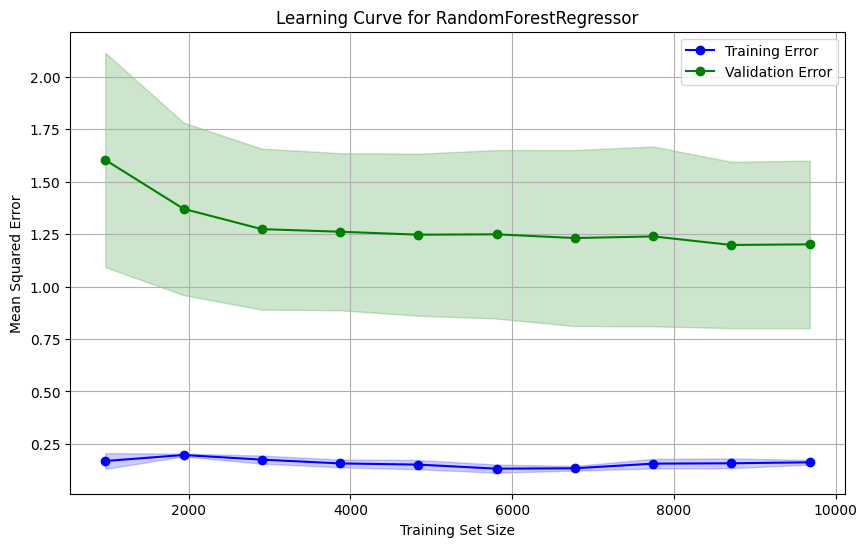

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(n_estimators=100, random_state=42))
])

train_sizes, train_scores, val_scores = learning_curve(
    pipeline, X, y, cv=5, scoring='neg_mean_squared_error',
    train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1
)

train_scores_mean = -train_scores.mean(axis=1)
train_scores_std = train_scores.std(axis=1)
val_scores_mean = -val_scores.mean(axis=1)
val_scores_std = val_scores.std(axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color='blue', label='Training Error')
plt.plot(train_sizes, val_scores_mean, 'o-', color='green', label='Validation Error')

plt.fill_between(train_sizes,
                 train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std,
                 color='blue', alpha=0.2)
plt.fill_between(train_sizes,
                 val_scores_mean - val_scores_std,
                 val_scores_mean + val_scores_std,
                 color='green', alpha=0.2)

plt.title('Learning Curve for RandomForestRegressor')
plt.xlabel('Training Set Size')
plt.ylabel('Mean Squared Error')
plt.legend(loc='best')
plt.grid()
plt.show()

Mean Absolute Error: 0.32582395649205687
Mean Squared Error: 1.0089567313228154
R-squared: 0.9514689234421336
Adjusted R-squared: 0.9512068112712768
Root Mean Squared Error: 1.00446838244059
Mean Absolute Percentage Error: 7.681473578495682
Residual Standard Error: 1.0073853264270398


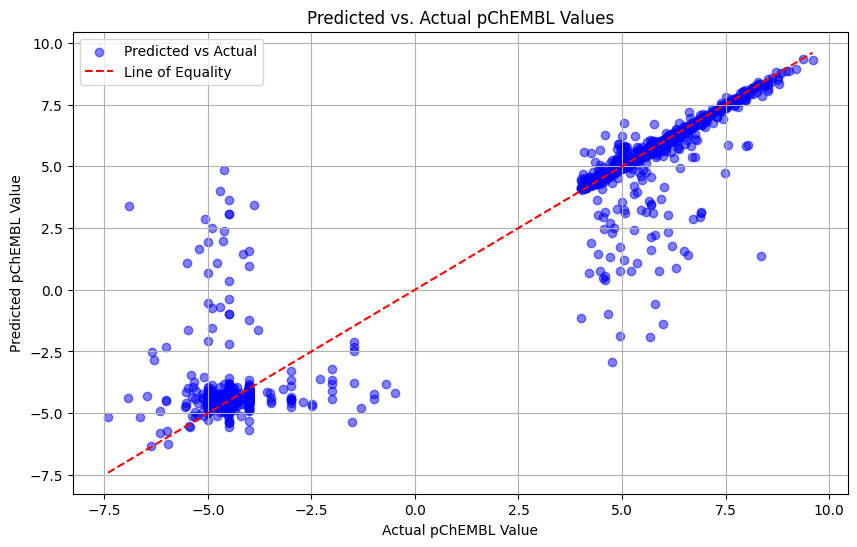

In [ ]:
# Train the model
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)


# Evaluate the model
# mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
residuals = y_test - y_pred
rse = np.sqrt(np.sum(residuals**2) / (len(y_test) - X.shape[1] - 1))

n = len(y_test)
p = X.shape[1]
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Print the evaluation metrics
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r2)
print("Adjusted R-squared:", adjusted_r2)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Percentage Error:", mape)
print("Residual Standard Error:", rse)

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue', label='Predicted vs Actual')

# Add a line of equality (45-degree line)
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Line of Equality')

# Add labels and title
plt.xlabel('Actual pChEMBL Value')
plt.ylabel('Predicted pChEMBL Value')
plt.title('Predicted vs. Actual pChEMBL Values')
plt.legend()
plt.grid(True)
plt.show()

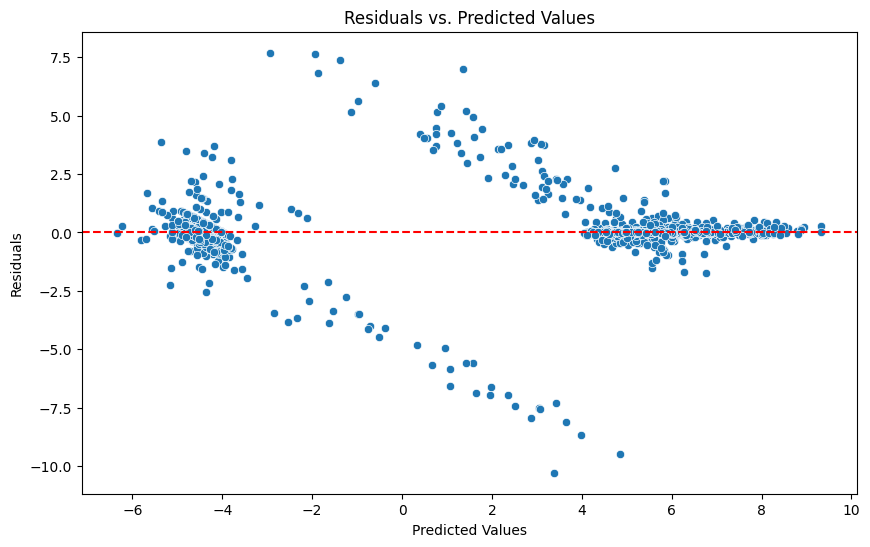

In [ ]:
import seaborn as sns

# Assuming y_true are the actual values and y_pred are the predicted values
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.show()

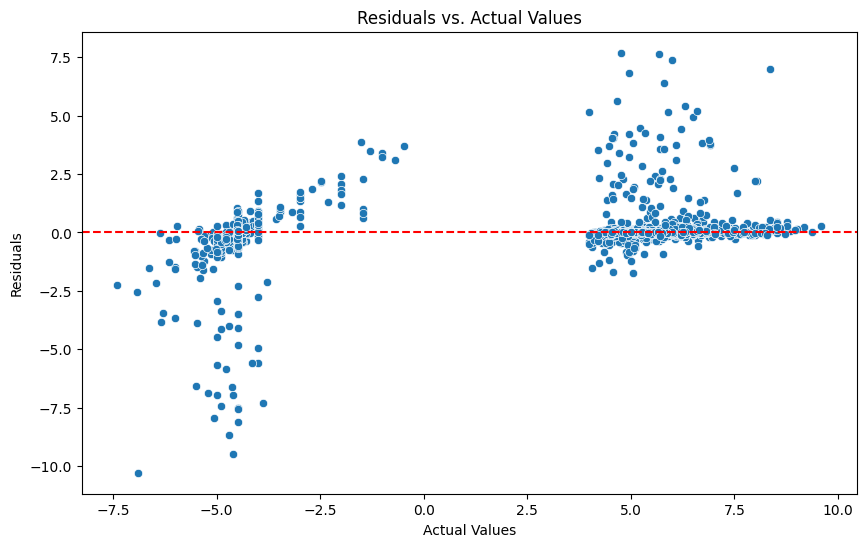

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Actual Values')
plt.show()

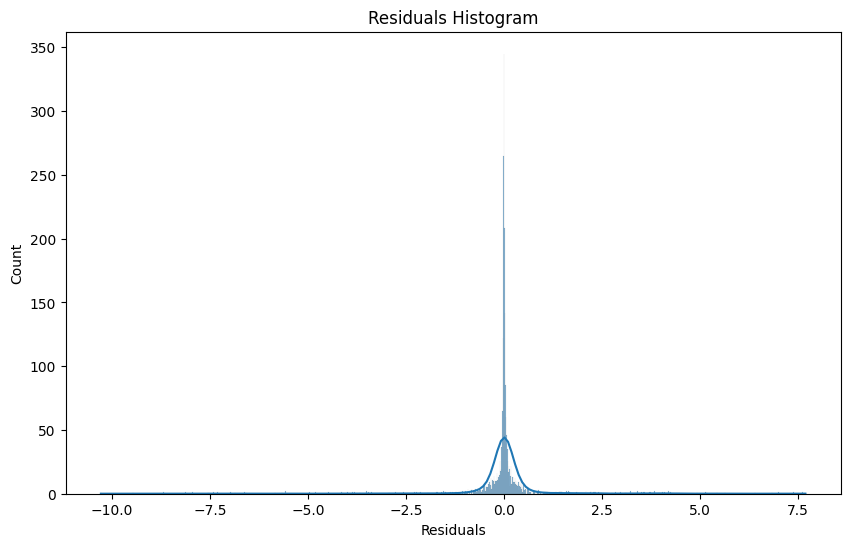

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Residuals Histogram')
plt.show()

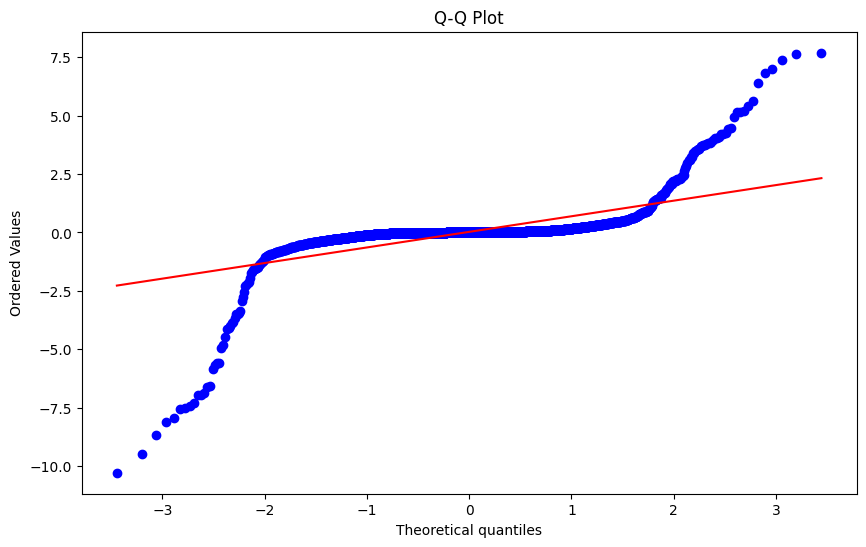

In [ ]:
import scipy.stats as stats

plt.figure(figsize=(10, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.show()